# **Important Python Libraries :**

- **Librosa** : Python lib that provides tools used for audio processing (like analyzing & extracting info)

- **Soundfile** : Python lib used for reading and writing sound files (specially audio data)

- **Noisreduce** : Python lib that uses a noise reduce algo called "spectral gating" to remove noise from audio


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install librosa

  Using cached librosa-0.10.0.post2-py3-none-any.whl (253 kB)
  Using cached audioread-3.0.0.tar.gz (377 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3 from https://files.pythonhosted.org/packages/86/a1/b8ef999c32f26a97b5f714887e21f96c12ae99a38583a0a96e65283ac0a1/numpy-1.25.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.25.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached scipy-1.11.1.tar.gz (56.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      + meson setup /private/var/folders/jk/_q23ggr53

In [3]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install noisereduce


  Using cached noisereduce-2.0.1-py3-none-any.whl (15 kB)
  Using cached scipy-1.11.1.tar.gz (56.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      + meson setup /private/var/folders/jk/_q23ggr53ggfqcf8jyx2zn040000gn/T/pip-install-4jk292y5/scipy_f5bf092ae31a4eaab9bcb5c58c97a54e /private/var/folders/jk/_q23ggr53ggfqcf8jyx2zn040000gn/T/pip-install-4jk292y5/scipy_f5bf092ae31a4eaab9bcb5c58c97a54e/.mesonpy-4yz9maeu/build -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=/private/var/folders/jk/_q23ggr53ggfqcf8jyx2zn040000gn/T/pip-install-4jk292y5/scipy_f5bf092ae31a4eaab9bcb5c58c97a54e/.mesonpy-4yz9maeu/build/meson-python-native-file.ini
      The Meson build system
      Version: 1.2.0


In [4]:
pip install scipy

  Using cached scipy-1.11.1.tar.gz (56.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      + meson setup /private/var/folders/jk/_q23ggr53ggfqcf8jyx2zn040000gn/T/pip-install-r3hv8khu/scipy_72d74fe3a32d41768af5e59871a38997 /private/var/folders/jk/_q23ggr53ggfqcf8jyx2zn040000gn/T/pip-install-r3hv8khu/scipy_72d74fe3a32d41768af5e59871a38997/.mesonpy-h2sm69i0/build -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=/private/var/folders/jk/_q23ggr53ggfqcf8jyx2zn040000gn/T/pip-install-r3hv8khu/scipy_72d74fe3a32d41768af5e59871a38997/.mesonpy-h2sm69i0/build/meson-python-native-file.ini
      The Meson build system
      Version: 1.2.0
      Source dir: /private/var/folders/jk/_q23ggr53ggfqcf8

In [5]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
import librosa
%matplotlib inline

ModuleNotFoundError: No module named 'scipy'

## **Loading Input Audio File**

In [ ]:
url = "/content/2-Way Mode_ Speech vs. Noisy EnvironmentUnit#4.mp3"
data, rate = librosa.load(url)

In [ ]:
IPython.display.Audio(data=data, rate=rate)

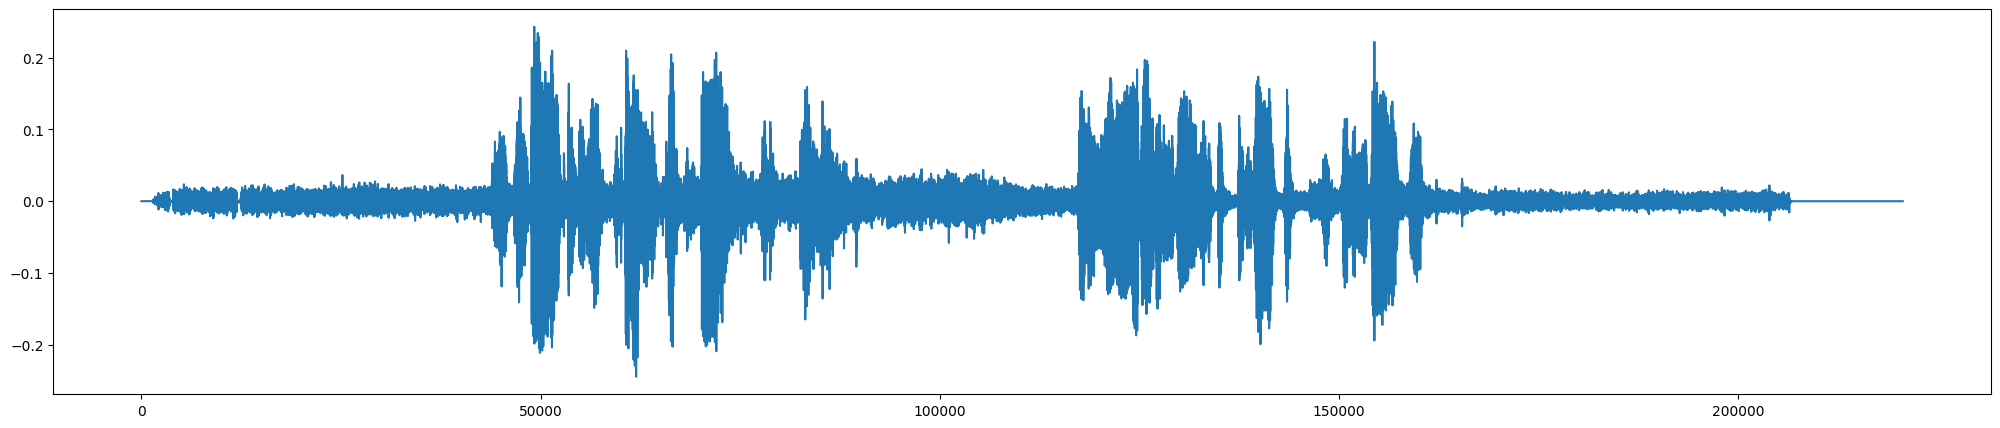

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(data)

## **Removing Stationary Noise**
  - only uses the intially estimated noise threshold

- ***Stationary Noise*** - noise whose statistical properties (like mean, variance, and autocorrelation) remain constant over time.

    *Ex* : Humming Noise

In [ ]:
reduced_noise = nr.reduce_noise(y = data, sr=rate, n_std_thresh_stationary=1.7,stationary=True)

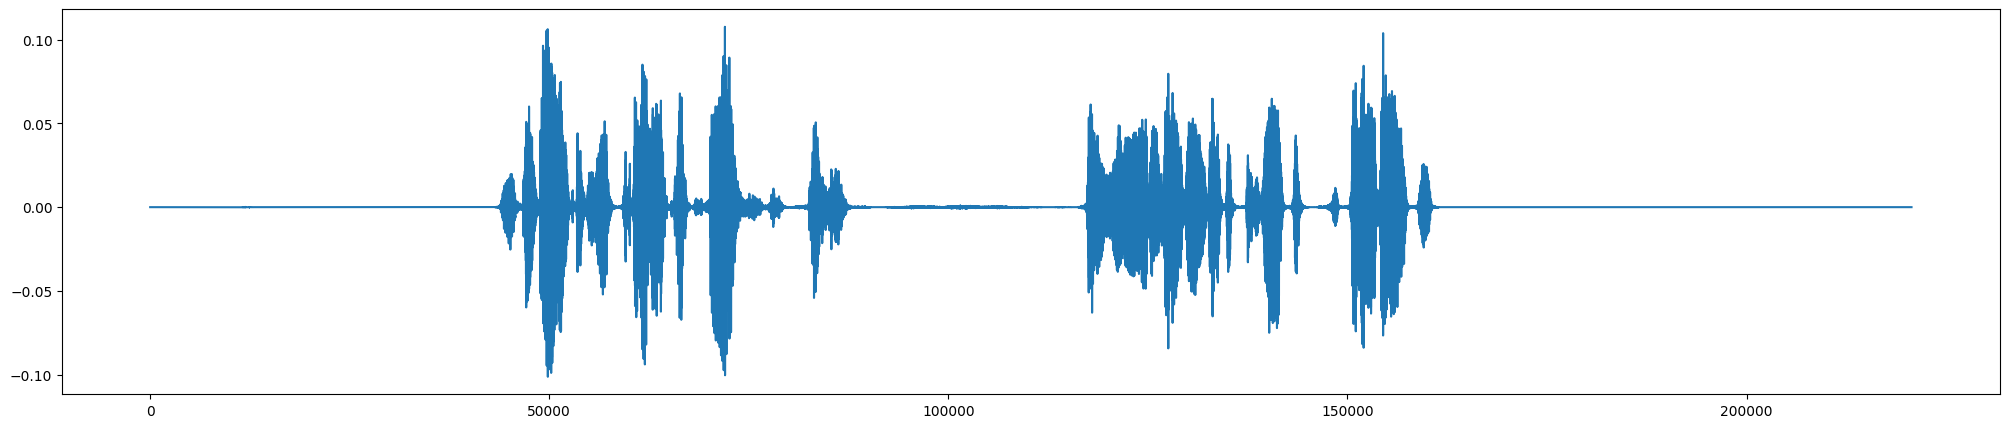

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

## **Removing Non-Stationary Noise**
 - keeps updating the intially estimated noise threshold during the process of noise reduction.

 - ***Non-Stationary Noise*** - noise whose statistical properties change over time.
  
  *Ex* : Enivronmental Noise (like Traffic, Crowd, Wind etc)

In [ ]:
reduced_noise = nr.reduce_noise(y=data, sr=rate, thresh_n_mult_nonstationary=3,stationary=False)

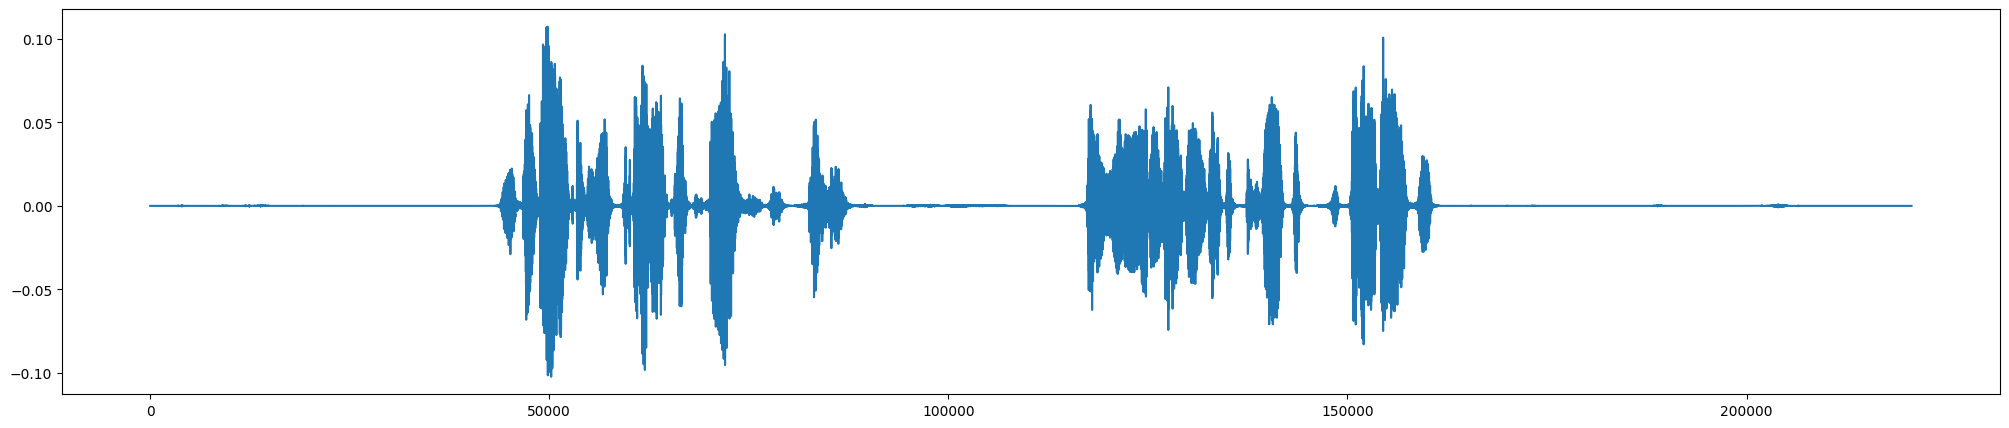

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)